# Fusion des Datasets

In [207]:
import pandas as pd
merged_df = pd.read_csv("merged_data.csv")

In [208]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Crypto
0,"Jan 1, 2025","93,425.10","94,929.87","92,788.13","94,419.76","94,419.76","24,519,888,919",Bitcoin (BTC)
1,"Dec 31, 2024","92,643.25","96,090.60","91,914.03","93,429.20","93,429.20","43,625,106,843",Bitcoin (BTC)
2,"Dec 30, 2024","93,527.20","94,903.32","91,317.13","92,643.21","92,643.21","56,188,003,691",Bitcoin (BTC)
3,"Dec 29, 2024","95,174.05","95,174.88","92,881.79","93,530.23","93,530.23","29,635,885,267",Bitcoin (BTC)
4,"Dec 28, 2024","94,160.19","95,525.90","94,014.29","95,163.93","95,163.93","24,107,436,185",Bitcoin (BTC)


In [209]:
merged_df.dtypes

Date         object
Open         object
High         object
Low          object
Close        object
Adj Close    object
Volume       object
Crypto       object
dtype: object

In [210]:
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [211]:
# Convertir 'Date' en datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%b %d, %Y')

# Convertir les colonnes numériques en float
for col in numerical_columns:
    merged_df[col] = merged_df[col].str.replace(',', '').astype(float)

# Vérifier les résultats
print(merged_df.dtypes)
print(merged_df)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Crypto               object
dtype: object
            Date        Open        High         Low       Close   Adj Close  \
0     2025-01-01  93425.1000  94929.8700  92788.1300  94419.7600  94419.7600   
1     2024-12-31  92643.2500  96090.6000  91914.0300  93429.2000  93429.2000   
2     2024-12-30  93527.2000  94903.3200  91317.1300  92643.2100  92643.2100   
3     2024-12-29  95174.0500  95174.8800  92881.7900  93530.2300  93530.2300   
4     2024-12-28  94160.1900  95525.9000  94014.2900  95163.9300  95163.9300   
...          ...         ...         ...         ...         ...         ...   
18275 2020-01-05      3.2599      3.8623      3.1715      3.4963      3.4963   
18276 2020-01-04      3.4744      3.5112      3.0931      3.2708      3.2708   
18277 2020-01-03      4.4854      4.4939  

In [212]:
# Calcul du pourcentage de NaN pour chaque colonne
nan_percentage = merged_df.isna().mean() * 100

# Affichage des résultats
for column, percentage in nan_percentage.items():
    print(f"Colonne: {column} | Pourcentage de NaN: {percentage:.2f}%")

Colonne: Date | Pourcentage de NaN: 0.00%
Colonne: Open | Pourcentage de NaN: 0.00%
Colonne: High | Pourcentage de NaN: 0.00%
Colonne: Low | Pourcentage de NaN: 0.00%
Colonne: Close | Pourcentage de NaN: 0.00%
Colonne: Adj Close | Pourcentage de NaN: 0.00%
Colonne: Volume | Pourcentage de NaN: 0.00%
Colonne: Crypto | Pourcentage de NaN: 0.00%


Pourcentage d'outliers pour Open : 19.85%
Pourcentage d'outliers pour High : 19.84%
Pourcentage d'outliers pour Low : 19.87%
Pourcentage d'outliers pour Close : 19.85%
Pourcentage d'outliers pour Adj Close : 19.85%
Pourcentage d'outliers pour Volume : 18.72%


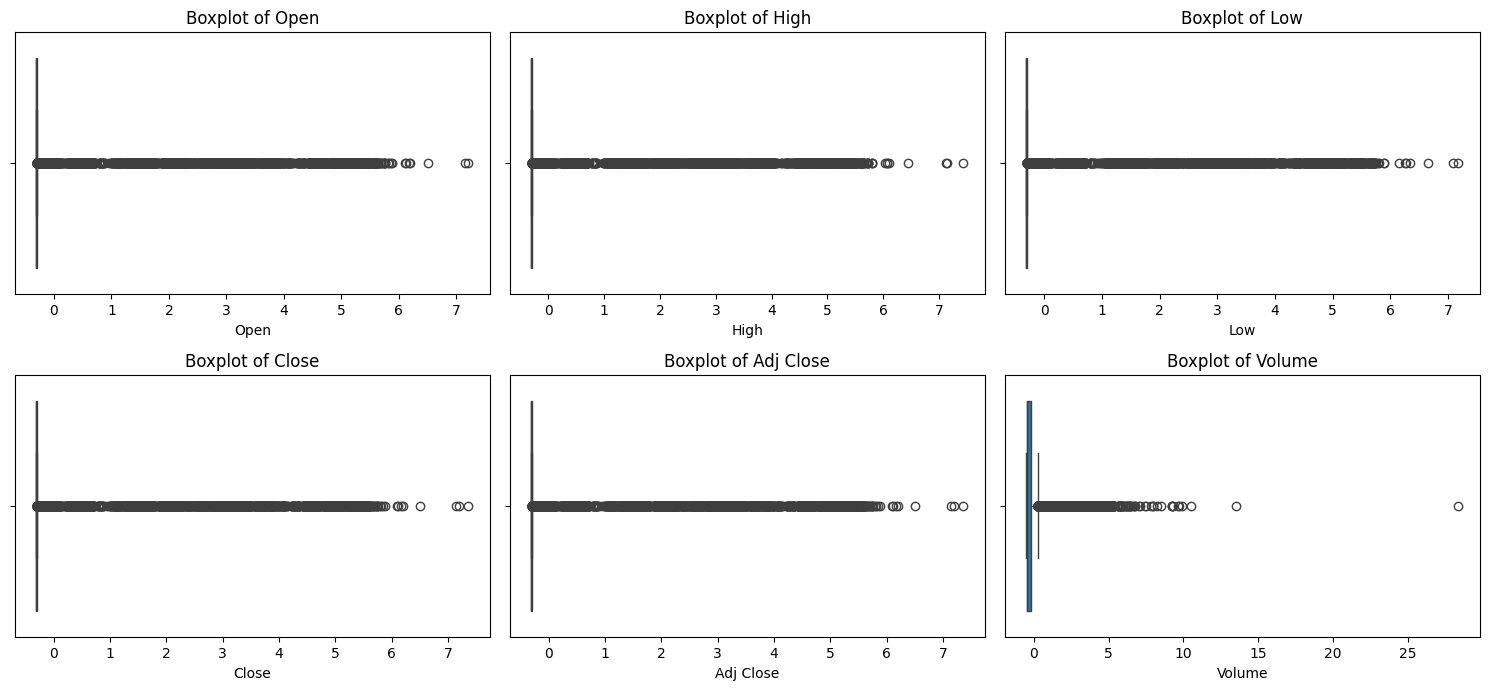

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des outliers et pourcentage
def detect_outliers_and_percentage(df, columns):
    outliers_count = {}
    total_rows = len(df)
    
    for col in columns:
        # Calcul des quartiles et de l'IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les bornes pour détecter les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifier les outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = outliers.shape[0]

        # Calculer le pourcentage d'outliers
        outliers_percentage = (outliers.shape[0] / total_rows) * 100
        print(f"Pourcentage d'outliers pour {col} : {outliers_percentage:.2f}%")
    
    return outliers_count

# Appliquer la fonction sur votre DataFrame
outliers_count = detect_outliers_and_percentage(merged_df, numerical_columns)

# Tracer les boxplots pour chaque variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Créer une grille de 2x3 pour les boxplots
    sns.boxplot(x=merged_df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


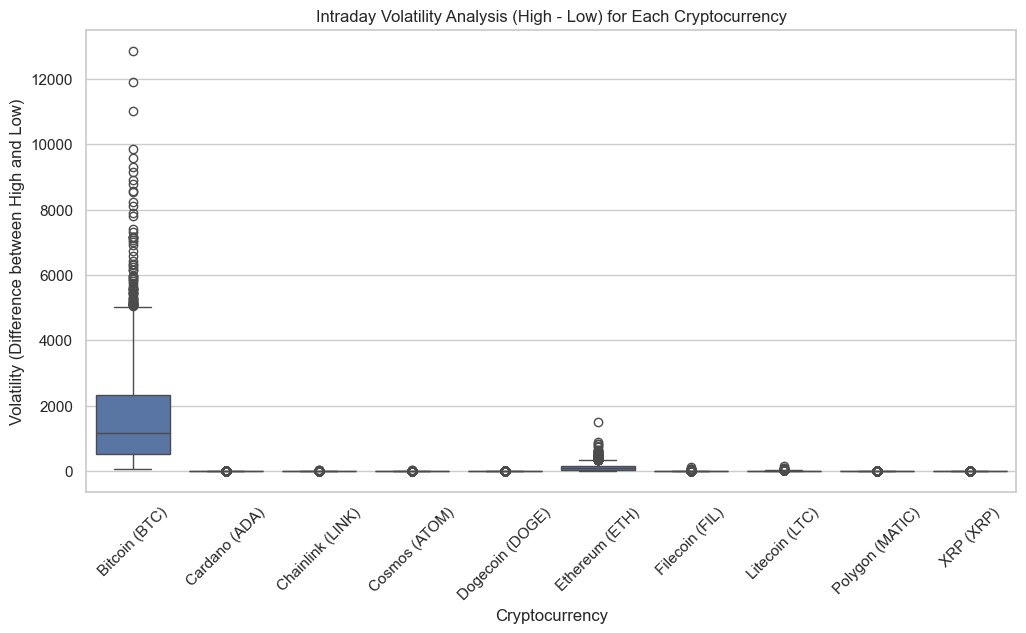

ValueError: 'Crypto' is both an index level and a column label, which is ambiguous.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate intraday volatility (difference between High and Low)
merged_df['Volatility'] = merged_df['High'] - merged_df['Low']

# Plot intraday volatility for each cryptocurrency
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crypto', y='Volatility', data=merged_df)
plt.title('Intraday Volatility Analysis (High - Low) for Each Cryptocurrency')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (Difference between High and Low)')
plt.xticks(rotation=45)
plt.show()

# Compute descriptive statistics for each cryptocurrency
volatility_stats_by_crypto = merged_df.groupby('Crypto')['Volatility'].describe()

print("Volatility Statistics (High - Low) by Cryptocurrency:")
print(volatility_stats_by_crypto)



## Feature engeneering 